In [47]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import scipy as sp

In [19]:
import gvpy as gv
import niskine

In [25]:
conf = niskine.io.load_config()
fqmat = gv.io.loadmat(conf.data.proc.adcp.joinpath("FQ_InterpolatedFinal.mat"))


In [28]:
fqtime = gv.time.mtlb2datetime(fqmat['dnum'][0, :])

In [48]:
znew = np.arange(0, 2016, 16)

unew = np.ones((len(znew), len(fqtime))) * np.nan
vnew = unew.copy()
wnew = unew.copy()

for i, (ui, zi) in enumerate(zip(fqmat['u'].T, fqmat['z'].T)):
    unew[:, i] = sp.interpolate.interp1d(zi, ui, bounds_error=False)(znew)

for i, (vi, zi) in enumerate(zip(fqmat['v'].T, fqmat['z'].T)):
    vnew[:, i] = sp.interpolate.interp1d(zi, vi, bounds_error=False)(znew)

for i, (wi, zi) in enumerate(zip(fqmat['w'].T, fqmat['z'].T)):
    wnew[:, i] = sp.interpolate.interp1d(zi, wi, bounds_error=False)(znew)

In [49]:
fq = xr.Dataset(
    data_vars=dict(
        u=(("z", "time"), unew),
        v=(("z", "time"), vnew),
        w=(("z", "time"), wnew),
    ),
    coords=dict(z=(("z"), znew), time=(("time"), fqtime)),
)

/var/folders/vl/tj6snrv54zd212pkvk5g_l140000gn/T/ipykernel_5981/1858642952.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  fq = xr.Dataset(


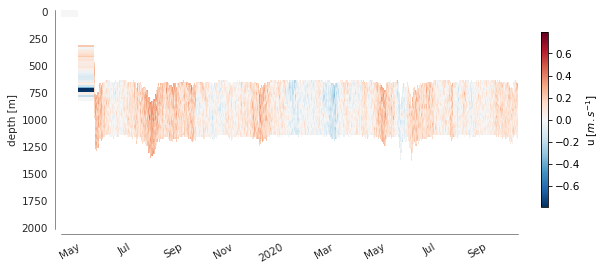

In [52]:
# %%
fq.u.attrs = dict(long_name='u', units=r'$m.s^{-1}$')
fq.v.attrs = dict(long_name='u', units=r'$m.s^{-1}$')
fq.w.attrs = dict(long_name='u', units=r'$m.s^{-1}$')
fq.z.attrs = dict(long_name='depth', units='m')

# %%
fq.attrs = dict(project='NISKINe', mooring='M2', sn=10185)

# %%
fq.u.gv.tplot()

# %% [markdown]
# Now save with the same name pattern as the other ADCPs.

# %%
savename = '/Users/zcasparcohen/Documents/NISKINE/data/v1/M2_10185.nc'

# %%
fq.to_netcdf(savename)